#### Know data
#####   1) Understand data with descriptive statistics
#####   2) Understand data with visualization

In [42]:
import pandas_datareader.data as web
import pandas as pd
import datetime as dt
import seaborn as sns
from pandas.plotting import scatter_matrix
%matplotlib inline

In [43]:
start = dt.datetime(1990, 1, 1)
end = dt.datetime(2020, 12, 31)

# good to used data
econ_data_1 = web.DataReader(["FEDFUNDS", "UNRATE", "UMCSENT"], "fred", start, end)
# data need to change to yoy
econ_data_2 = web.DataReader(["CPIAUCSL", "CSUSHPINSA", "INDPRO", "PPIACO"], "fred", start, end).pct_change(12)*100
# concat whole data
econ_data = pd.concat([econ_data_1, econ_data_2], axis=1).dropna()

In [44]:
print(econ_data.head(3)) # see first data
print(econ_data.tail(3)) # see last data
print(econ_data.shape)  # dimensions of data
print(econ_data.dtypes) # data type for each attributes

            FEDFUNDS  UNRATE  UMCSENT  CPIAUCSL  CSUSHPINSA    INDPRO  \
DATE                                                                    
1991-01-01      6.91     6.4     66.8  5.647059   -1.301501 -0.871861   
1991-02-01      6.25     6.6     70.4  5.312500   -1.748338 -2.463019   
1991-03-01      6.12     6.8     87.7  4.821151   -2.155229 -3.472026   

              PPIACO  
DATE                  
1991-01-01  3.568320  
1991-02-01  2.447552  
1991-03-01  1.751313  
            FEDFUNDS  UNRATE  UMCSENT  CPIAUCSL  CSUSHPINSA    INDPRO  \
DATE                                                                    
2020-10-01      0.09     6.9     81.8  1.184198    8.427502 -4.749543   
2020-11-01      0.09     6.7     76.9  1.137757    9.540126 -4.732634   
2020-12-01      0.09     6.7     80.7  1.278154   10.441181 -3.279442   

              PPIACO  
DATE                  
2020-10-01 -1.057402  
2020-11-01 -0.351759  
2020-12-01  0.753769  
(360, 7)
FEDFUNDS      float64
UNRATE 

         FEDFUNDS      UNRATE     UMCSENT    CPIAUCSL  CSUSHPINSA      INDPRO  \
count  360.000000  360.000000  360.000000  360.000000  360.000000  360.000000   
mean     2.647028    5.924167   87.551667    2.311827    3.749471    1.490236   
std      2.203718    1.762121   12.277402    1.154060    5.573562    4.323953   
min      0.050000    3.500000   55.300000   -1.958761  -12.753483  -17.654514   
25%      0.200000    4.600000   78.375000    1.666667    0.883108   -0.111939   
50%      2.175000    5.550000   89.800000    2.326150    4.377356    2.568716   
75%      5.070000    6.900000   96.025000    3.015882    7.546161    3.992068   
max      6.910000   14.700000  112.000000    5.647059   14.507405    8.541889   

           PPIACO  
count  360.000000  
mean     1.844316  
std      4.861821  
min    -16.058394  
25%     -0.857868  
50%      1.995315  
75%      4.968610  
max     17.361508  


FEDFUNDS         AxesSubplot(0.125,0.536818;0.168478x0.343182)
UNRATE        AxesSubplot(0.327174,0.536818;0.168478x0.343182)
UMCSENT       AxesSubplot(0.529348,0.536818;0.168478x0.343182)
CPIAUCSL      AxesSubplot(0.731522,0.536818;0.168478x0.343182)
CSUSHPINSA          AxesSubplot(0.125,0.125;0.168478x0.343182)
INDPRO           AxesSubplot(0.327174,0.125;0.168478x0.343182)
PPIACO           AxesSubplot(0.529348,0.125;0.168478x0.343182)
dtype: object

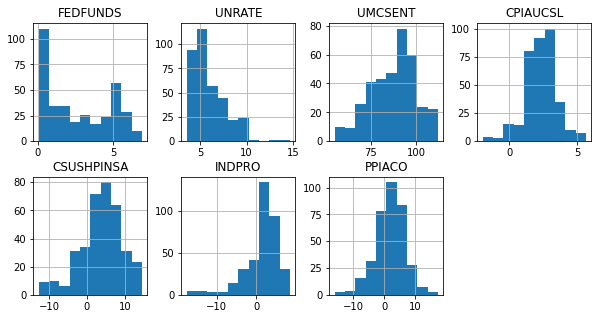

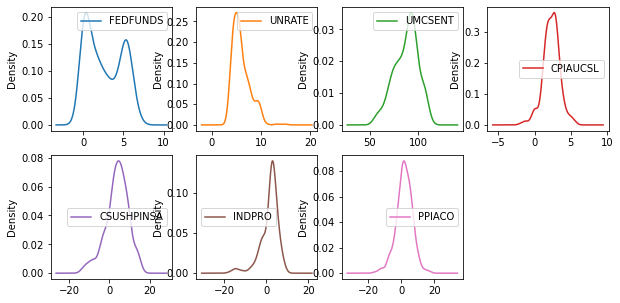

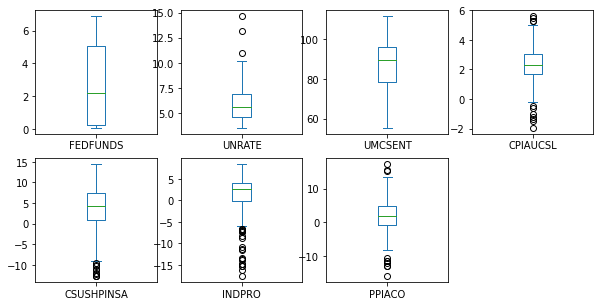

In [45]:
print(econ_data.describe()) # descriptive statistics
econ_data.hist(layout=(2,4), figsize=(10,5))
econ_data.plot(kind="density", subplots=True, layout=(2,4), figsize=(10,5), sharex=False)
econ_data.plot(kind="box", subplots=True, layout=(2,4), sharex=False, figsize=(10,5), sharey=False)

            FEDFUNDS    UNRATE   UMCSENT  CPIAUCSL  CSUSHPINSA    INDPRO  \
FEDFUNDS    1.000000 -0.485031  0.468463  0.521723    0.069101  0.404112   
UNRATE     -0.485031  1.000000 -0.738800 -0.221690   -0.449732 -0.303042   
UMCSENT     0.468463 -0.738800  1.000000 -0.017366    0.584300  0.428304   
CPIAUCSL    0.521723 -0.221690 -0.017366  1.000000    0.038430  0.375850   
CSUSHPINSA  0.069101 -0.449732  0.584300  0.038430    1.000000  0.294086   
INDPRO      0.404112 -0.303042  0.428304  0.375850    0.294086  1.000000   
PPIACO      0.162155 -0.114054 -0.091175  0.775322    0.086465  0.460919   

              PPIACO  
FEDFUNDS    0.162155  
UNRATE     -0.114054  
UMCSENT    -0.091175  
CPIAUCSL    0.775322  
CSUSHPINSA  0.086465  
INDPRO      0.460919  
PPIACO      1.000000  


<AxesSubplot:>

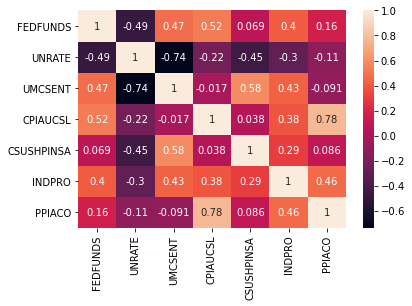

In [46]:
print(econ_data.corr()) # correlations between attributes
sns.heatmap(econ_data.corr(), annot=True) # correlations chart

array([[<AxesSubplot:xlabel='FEDFUNDS', ylabel='FEDFUNDS'>,
        <AxesSubplot:xlabel='UNRATE', ylabel='FEDFUNDS'>,
        <AxesSubplot:xlabel='UMCSENT', ylabel='FEDFUNDS'>,
        <AxesSubplot:xlabel='CPIAUCSL', ylabel='FEDFUNDS'>,
        <AxesSubplot:xlabel='CSUSHPINSA', ylabel='FEDFUNDS'>,
        <AxesSubplot:xlabel='INDPRO', ylabel='FEDFUNDS'>,
        <AxesSubplot:xlabel='PPIACO', ylabel='FEDFUNDS'>],
       [<AxesSubplot:xlabel='FEDFUNDS', ylabel='UNRATE'>,
        <AxesSubplot:xlabel='UNRATE', ylabel='UNRATE'>,
        <AxesSubplot:xlabel='UMCSENT', ylabel='UNRATE'>,
        <AxesSubplot:xlabel='CPIAUCSL', ylabel='UNRATE'>,
        <AxesSubplot:xlabel='CSUSHPINSA', ylabel='UNRATE'>,
        <AxesSubplot:xlabel='INDPRO', ylabel='UNRATE'>,
        <AxesSubplot:xlabel='PPIACO', ylabel='UNRATE'>],
       [<AxesSubplot:xlabel='FEDFUNDS', ylabel='UMCSENT'>,
        <AxesSubplot:xlabel='UNRATE', ylabel='UMCSENT'>,
        <AxesSubplot:xlabel='UMCSENT', ylabel='UMCSENT'>,
        

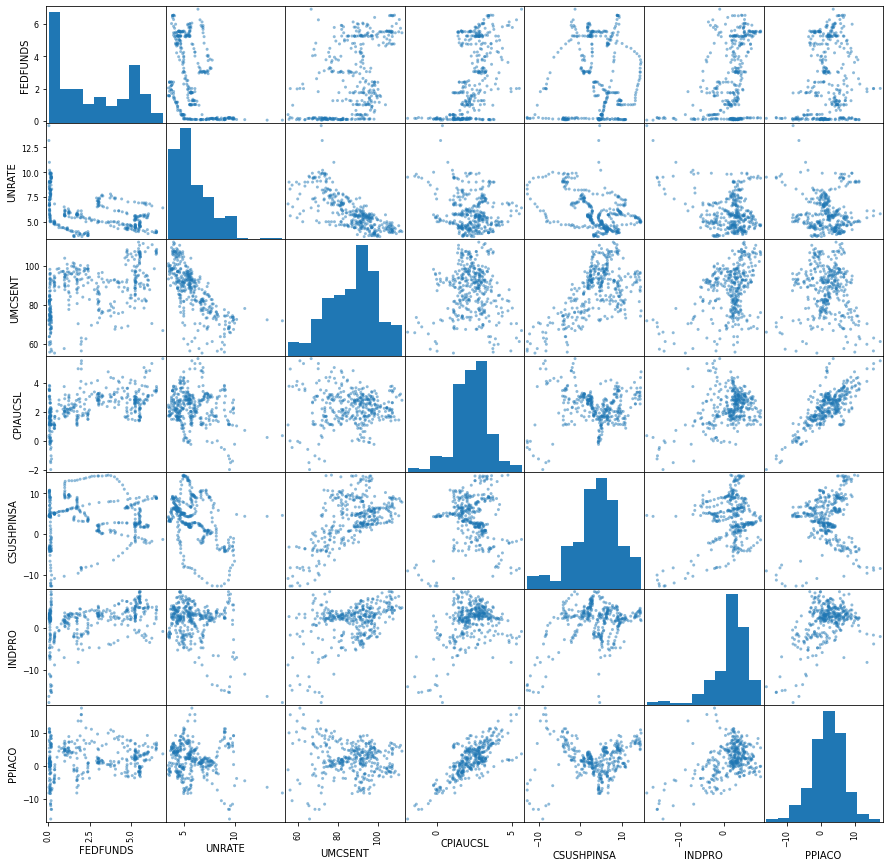

In [47]:
scatter_matrix(econ_data, figsize=(15,15) )